In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(f'G:\ineuron\dataset\household_power_consumption.txt', sep=';',na_values=['nan','?'])

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


* Data include 'nan' and '?'. I converted both to numpy nan in importing stage (above) and treated both of them the same

In [4]:
data.shape

(2075259, 9)

In [5]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [7]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
# fill missing values with forword fill as this is data regarding power consumption everyday

data.ffill(axis=0,inplace=True)

In [9]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.086168,1.053172,0.076,0.308,0.598,1.524,11.122
Global_reactive_power,2075259.0,0.123328,0.112514,0.000,0.048,0.100,0.194,1.390
Voltage,2075259.0,240.841608,3.235574,223.200,239.000,241.020,242.870,254.150
Global_intensity,2075259.0,4.604226,4.426775,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2075259.0,1.110995,6.115908,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2075259.0,1.287958,5.786865,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2075259.0,6.416570,8.419505,0.000,0.000,1.000,17.000,31.000


# data sampling 
* we will take data of the year 2010

In [11]:
# Converting Date Datatype form object to datetime

data['Date'] = pd.to_datetime(data['Date'])

In [12]:
df = data.sample(n=50000)

In [13]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1672799,2010-02-20,09:23:00,1.558,0.296,241.68,6.6,1.0,0.0,18.0
1064809,2008-12-25,04:13:00,0.300,0.078,246.11,1.2,0.0,1.0,0.0
1667508,2010-02-16,17:12:00,0.792,0.134,245.31,3.2,0.0,2.0,1.0
69957,2007-03-02,07:21:00,2.652,0.100,237.59,11.0,0.0,0.0,0.0
244046,2007-04-06,04:50:00,0.266,0.072,235.24,1.2,0.0,1.0,0.0


In [14]:
df.reset_index(inplace=True)

In [15]:
df.drop("index",axis=1, inplace=True)

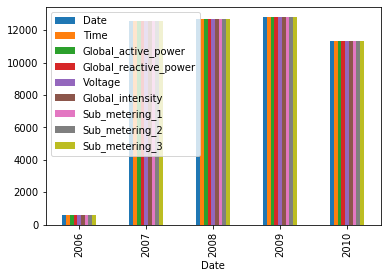

In [16]:
#distribution of data year wise
df.groupby(df["Date"].dt.year).count().plot(kind="bar")
plt.show()

In [17]:
#remove 2006 data
df1= df[df.Date>'2006-12-31']

In [18]:
df1.shape

(49430, 9)

* creating target variable power_consumption by merging Sub_metering_1, Sub_metering_2, Sub_metering_3 and subtracting it from global_active_power

In [19]:
eq1 = (df1['Global_active_power']*1000/60) 
eq2 = df1['Sub_metering_1'] + df1['Sub_metering_2'] + df1['Sub_metering_3']
df1['power_consumption'] = eq1 - eq2
df1.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,2010-02-20,09:23:00,1.558,0.296,241.68,6.6,1.0,0.0,18.0,6.966667
1,2008-12-25,04:13:00,0.300,0.078,246.11,1.2,0.0,1.0,0.0,4.000000
2,2010-02-16,17:12:00,0.792,0.134,245.31,3.2,0.0,2.0,1.0,10.200000
3,2007-03-02,07:21:00,2.652,0.100,237.59,11.0,0.0,0.0,0.0,44.200000
4,2007-04-06,04:50:00,0.266,0.072,235.24,1.2,0.0,1.0,0.0,3.433333


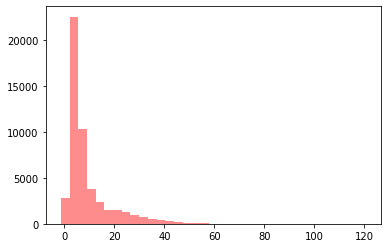

In [20]:
#distribution o traget variable
plt.hist(df1['power_consumption'],bins = 35,
         alpha = 0.45, color = 'red')
plt.show()

In [21]:
times = pd.DatetimeIndex(df1.Date)
grouped = df1.groupby([times.year])
grouped.head()
grouped["power_consumption"].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2007,12605.0,9.834976,10.751832,-1.400000,3.766667,5.333333,10.533333,120.400000
2008,12711.0,9.571893,10.203082,-0.666667,3.733333,5.633333,10.750000,106.066667
2009,12797.0,8.741775,8.501145,-0.433333,3.866667,5.466667,9.666667,103.266667
2010,11317.0,8.298948,7.434085,0.200000,3.866667,5.400000,9.933333,78.566667


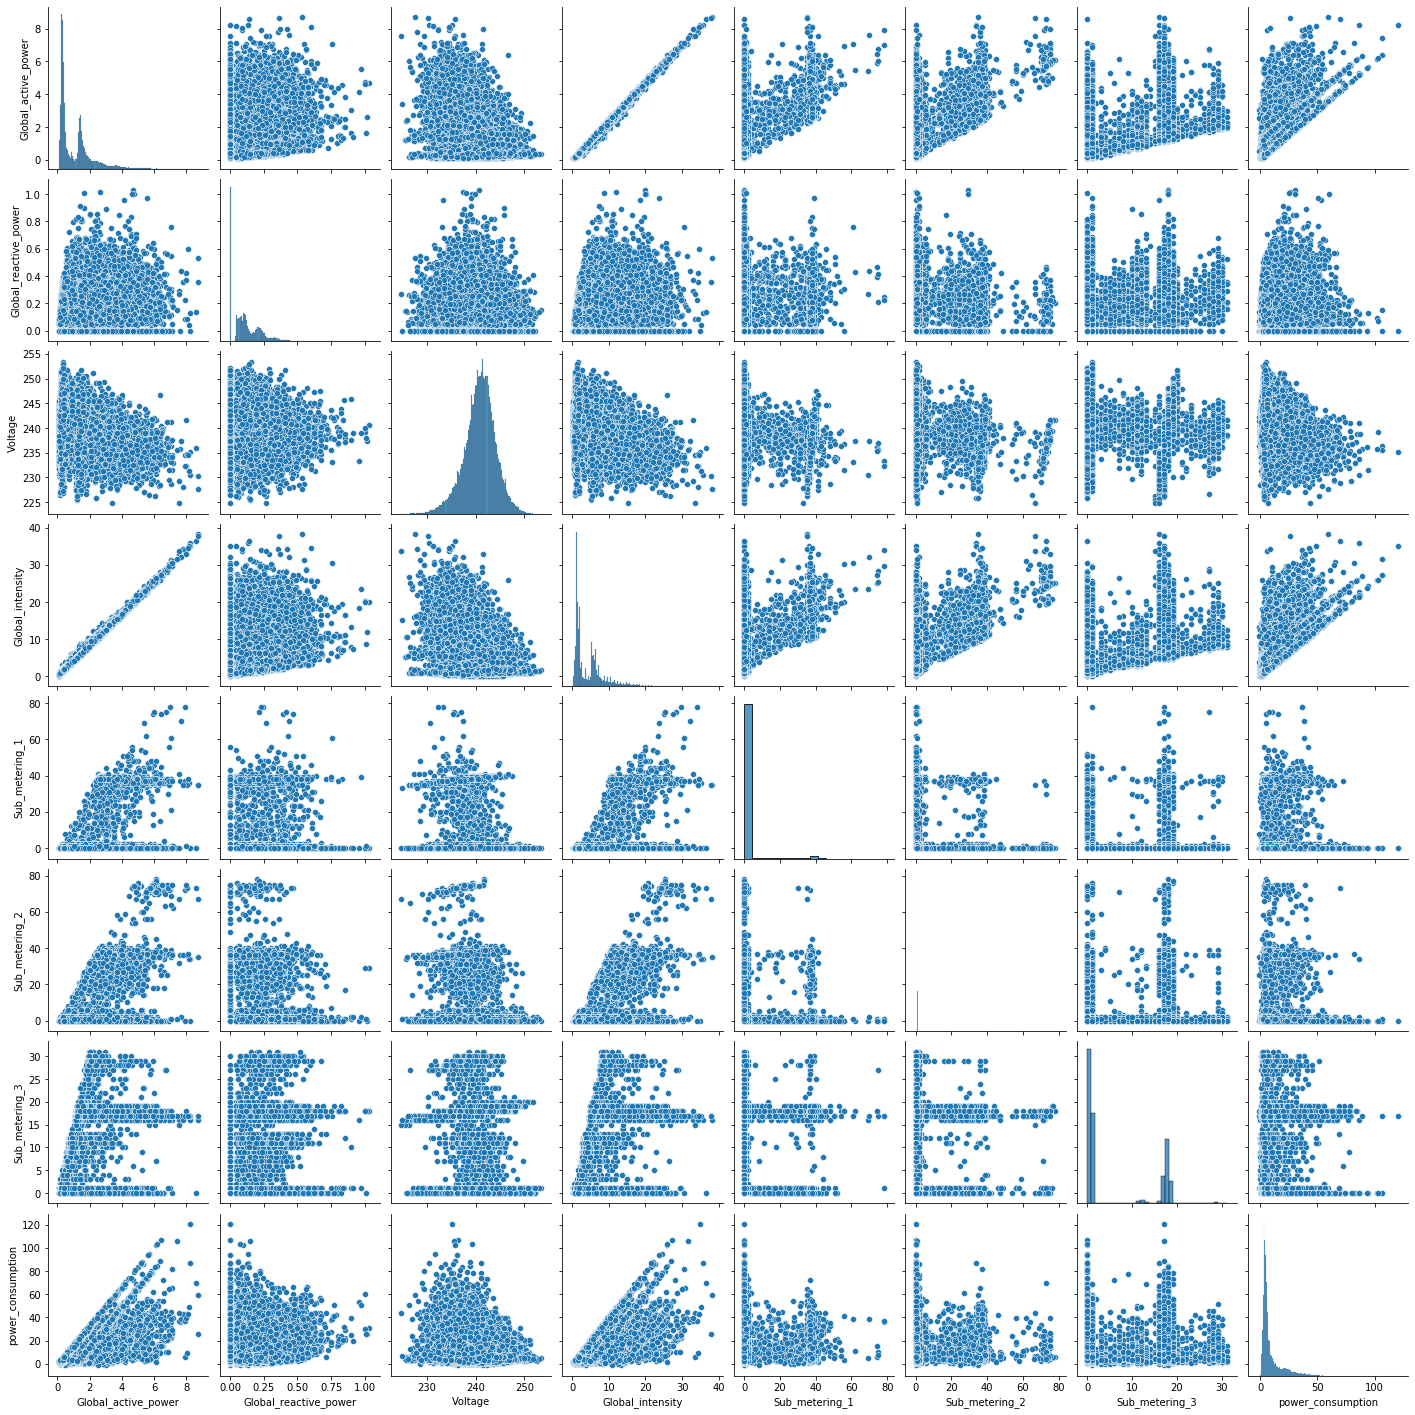

In [22]:
sns.pairplot(df1)

In [23]:
df1.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Global_active_power,1.000000,0.249039,-0.398085,0.998925,0.476431,0.453255,0.641521,0.693798
Global_reactive_power,0.249039,1.000000,-0.110757,0.268197,0.119976,0.139837,0.091342,0.216126
Voltage,-0.398085,-0.110757,1.000000,-0.409586,-0.193428,-0.168153,-0.262732,-0.275043
Global_intensity,0.998925,0.268197,-0.409586,1.000000,0.481620,0.458894,0.629427,0.695772
Sub_metering_1,0.476431,0.119976,-0.193428,0.481620,1.000000,0.055391,0.105196,0.124113
Sub_metering_2,0.453255,0.139837,-0.168153,0.458894,0.055391,1.000000,0.089959,0.089656
Sub_metering_3,0.641521,0.091342,-0.262732,0.629427,0.105196,0.089959,1.000000,0.171997
power_consumption,0.693798,0.216126,-0.275043,0.695772,0.124113,0.089656,0.171997,1.000000


In [24]:
x = df1[["Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]]
y = df1["power_consumption"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=10)

In [26]:
X_train.shape

(33118, 6)

## model training

### bagging Regressor 

In [30]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

In [31]:
bagging_reg = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)

In [32]:
bagging_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=SVR(), random_state=0)

In [34]:
y_pred1 = bagging_reg.predict(X_test)

In [27]:
#performance evaluation

In [36]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred1)
print(score)

0.9782582306696938


In [37]:
#Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9782502300186062

### Voting Regressor

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

In [42]:
voting_reg = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])

In [43]:
voting_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('r3', KNeighborsRegressor())])

In [44]:
y_pred2 = voting_reg.predict(X_test)

In [45]:
# R square
score2=r2_score(y_test,y_pred2)
print(score)

0.9782582306696938


In [46]:
#Adjusted R square
1 - (1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9960965814582102

### ExtraTree Regressor 

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
extratree_reg = ExtraTreesRegressor(n_estimators=100, random_state=0)

In [49]:
extratree_reg.fit(X_train, y_train)

ExtraTreesRegressor(random_state=0)

In [51]:
y_pred3=extratree_reg.predict(X_test)

In [52]:
# R square
score3=r2_score(y_test,y_pred3)
print(score)

0.9782582306696938


In [53]:
#Adjusted R square
1 - (1-score3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9956235375256914

### RandomForest Regressor  

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_reg = RandomForestRegressor(criterion='mse',max_depth=2, random_state=0,min_samples_leaf= 3,min_samples_split= 5)

In [57]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=5,
                      random_state=0)

In [58]:
y_pred4 = rf_reg.predict(X_test)

In [59]:
# R square
score4=r2_score(y_test,y_pred4)
print(score)

0.9782582306696938


In [60]:
#Adjusted R square
1 - (1-score4)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5106099348075017